In [52]:
import networkx as nx
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
import matplotlib as mpl
plt.rcParams['font.family'] = 'Ayuthaya'
# !wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# mpl.font_manager.fontManager.addfont('tahoma.ttf')
# mpl.rc('font', family='tahoma', size=10)

In [3]:
df = pd.read_excel('/content/drive/MyDrive/CRM_Analytics/hw07-product_recommendation/Customer Survey.xlsx')
df.rename(columns = {'Unnamed: 0':'date'}, inplace=True)
df.head()

,date,ประทับเวลา,Transaction,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2021-03-20,11:53:45,1,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,2021-03-20,11:54:01,2,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,2021-03-20,11:54:05,3,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,2021-03-20,11:54:13,4,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,2021-03-20,11:54:18,5,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [5]:
# there are only 2 classes --> เคย , ไม่เคย
pd.melt(df, id_vars=['date', 'ประทับเวลา','Transaction'])['value'].value_counts()

ไม่เคย    1642
เคย       1036
Name: value, dtype: int64

In [14]:
df_clean = df.iloc[:,3:].applymap(lambda x: 1 if x =='เคย' else 0)
df_clean.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1


## EDA

In [48]:
df_describe = pd.melt(df_clean).groupby('variable').agg({'value':['mean', 'sum']}).reset_index()
df_describe.columns = ['item', 'ratio', 'sum']
df_describe.sort_values(by='ratio', ascending=False, inplace=True)
df_describe.head()

,item,ratio,sum
17,ครีมกันแดด,1.000000,44
10,กระเป๋า,1.000000,44
22,ชาบู,1.000000,44
57,โรตี,0.954545,42
13,กะหรี่(ปั๊บ),0.931818,41


<Figure size 1440x576 with 0 Axes>

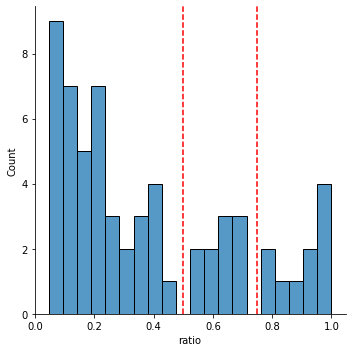

In [42]:
plt.figure(figsize=(20,8))
sns.displot(x='ratio', data = df_describe, bins=20)
plt.axvline(0.75, c ='red', ls ='--')
plt.axvline(0.5, c ='red', ls ='--')

In [49]:
# must have
df_describe[df_describe['ratio']>= 0.75]

,item,ratio,sum
17,ครีมกันแดด,1.000000,44
10,กระเป๋า,1.000000,44
22,ชาบู,1.000000,44
57,โรตี,0.954545,42
13,กะหรี่(ปั๊บ),0.931818,41
50,เม็ดมะม่วงหิมพานต์,0.909091,40
34,หมอนข้าง,0.863636,38
54,แฟน ที่แปลว่าพัดลม,0.818182,36
36,หมูแดดเดียว,0.795455,35
6,Software ถูกลิขสิทธิ์,0.772727,34


In [50]:
# nice to have
df_describe[(df_describe['ratio'] >= 0.5)&(df_describe['ratio']< 0.75)]

,item,ratio,sum
48,เนื้อย่าง,0.704545,31
26,ต้นไม้ประดับห้อง,0.704545,31
25,ตาชั่ง,0.681818,30
30,น้ำส้มดีโด้,0.659091,29
49,เนื้อวากิล,0.659091,29
0,Board game,0.636364,28
28,ที่ยกน้ำหนัก (Dumbell),0.613636,27
3,Lego,0.613636,27
42,เครื่องดูดฝุ่นอัตโนมัติ (robot),0.545455,24
20,คอลลาเจน,0.522727,23


In [51]:
# how do you have ? esp PS5 !!!
df_describe.tail(10)

,item,ratio,sum
19,คอร์สโบท็อกกราม,0.113636,5
14,กัญชง,0.090909,4
58,ไดร์เป่าผม Dyson,0.090909,4
7,Surfskate,0.068182,3
39,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,0.068182,3
18,คอร์ส bikini wax,0.068182,3
38,ห้องน้ำแมวอัตโนมัติ,0.068182,3
46,เครื่องย่อยเศษอาหาร.1,0.045455,2
5,PS5,0.045455,2
45,เครื่องย่อยเศษอาหาร,0.045455,2


## Frequent Itemsets

In [55]:
# apriori
frequent_itemsets = apriori(df_clean, min_support=0.5, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [56]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.522727,0.931818,0.500000,0.956522,1.026511,0.012913,1.568182
1,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.931818,0.522727,0.500000,0.536585,1.026511,0.012913,1.029904
2,(คอลลาเจน),(กระเป๋า),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
3,(กระเป๋า),(คอลลาเจน),1.000000,0.522727,0.522727,0.522727,1.000000,0.000000,1.000000
4,(ชาบู),(คอลลาเจน),1.000000,0.522727,0.522727,0.522727,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
322275,(เนื้อย่าง),"(ครีมกันแดด, แฟน ที่แปลว่าพัดลม, เนื้อวากิล, ก...",0.704545,0.522727,0.500000,0.709677,1.357644,0.131715,1.643939
322276,(ชาบู),"(ครีมกันแดด, แฟน ที่แปลว่าพัดลม, เนื้อวากิล, ก...",1.000000,0.500000,0.500000,0.500000,1.000000,0.000000,1.000000
322277,(โรตี),"(ครีมกันแดด, แฟน ที่แปลว่าพัดลม, เนื้อวากิล, ก...",0.954545,0.500000,0.500000,0.523810,1.047619,0.022727,1.050000
322278,(เม็ดมะม่วงหิมพานต์),"(ครีมกันแดด, แฟน ที่แปลว่าพัดลม, เนื้อวากิล, ก...",0.909091,0.500000,0.500000,0.550000,1.100000,0.045455,1.111111


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3592 missing from current font.
  font.set_text(s

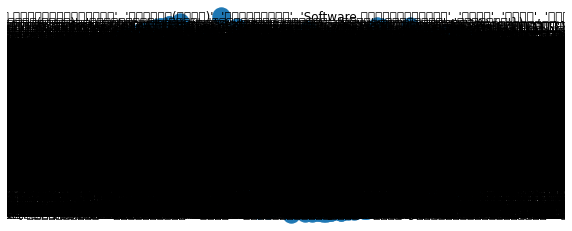

In [57]:
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show();

In [58]:
rules.shape

(322280, 9)

In [61]:
rules['antecedents'].apply(len).value_counts()

3    85415
4    76958
2    61568
5    46725
1    26372
6    19192
7     5163
8      827
9       60
Name: antecedents, dtype: int64

In [62]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,322280.000000,322280.000000,322280.000000,322280.000000,322280.000000,322280.000000,3.222800e+05
mean,0.698193,0.698193,0.539288,0.795432,1.146809,0.063598,inf
std,0.134649,0.134649,0.052128,0.136622,0.109815,0.040340,NaN
min,0.500000,0.500000,0.500000,0.500000,1.000000,0.000000,1.000000e+00
25%,0.590909,0.590909,0.500000,0.685714,1.064516,0.034091,1.227273e+00
50%,0.681818,0.681818,0.522727,0.806452,1.125695,0.061983,1.590909e+00
75%,0.795455,0.795455,0.545455,0.916667,1.198257,0.085227,2.363636e+00
max,1.000000,1.000000,1.000000,1.000000,1.499259,0.177686,inf


In [73]:
thres_conf = rules['confidence'] >= 0.8
thres_sup = rules['support'] >= 0.6
thres_lift = rules['lift'] >=1.2

rules_thres = rules[thres_conf&thres_sup&thres_lift]
rules_thres.shape

(1215, 9)

In [91]:
rules_thres['antecedents'] = rules_thres['antecedents'].apply(lambda x: list(x))
rules_thres['consequents'] = rules_thres['consequents'].apply(lambda x: list(x))
rules_thres.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,[เนื้อวากิล],[เนื้อย่าง],0.659091,0.704545,0.636364,0.965517,1.370412,0.172004,8.568182
157,[เนื้อย่าง],[เนื้อวากิล],0.704545,0.659091,0.636364,0.903226,1.370412,0.172004,3.522727
1430,"[เนื้อวากิล, กะหรี่(ปั๊บ)]",[เนื้อย่าง],0.636364,0.704545,0.613636,0.964286,1.368664,0.165289,8.272727
1432,"[กะหรี่(ปั๊บ), เนื้อย่าง]",[เนื้อวากิล],0.681818,0.659091,0.613636,0.900000,1.365517,0.164256,3.409091
1433,[เนื้อวากิล],"[กะหรี่(ปั๊บ), เนื้อย่าง]",0.659091,0.681818,0.613636,0.931034,1.365517,0.164256,4.613636


In [74]:
rules_thres['antecedents'].apply(len).value_counts()

3    380
2    296
4    278
5    127
1     96
6     34
7      4
Name: antecedents, dtype: int64

In [94]:
rules_thres['len_ant'] = rules_thres['antecedents'].apply(len)
rules_thres = rules_thres[rules_thres['len_ant']<=2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
rules_thres.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,len_ant
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.679499,0.676252,0.619202,0.912486,1.350854,0.160166,4.493970,1.755102
std,0.025284,0.032681,0.009786,0.035924,0.050953,0.019783,2.142652,0.430576
min,0.636364,0.636364,0.613636,0.818182,1.200000,0.102273,1.750000,1.000000
25%,0.659091,0.659091,0.613636,0.870968,1.365517,0.164256,2.818182,2.000000
50%,0.681818,0.681818,0.613636,0.903226,1.368664,0.165289,3.522727,2.000000
75%,0.704545,0.704545,0.613636,0.931034,1.368664,0.165289,4.613636,2.000000
max,0.750000,0.750000,0.636364,0.965517,1.370412,0.172004,8.568182,2.000000


In [97]:
rules_thres['antecedents'] = rules_thres['antecedents'].astype(str)
rules_thres['consequents'] = rules_thres['consequents'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


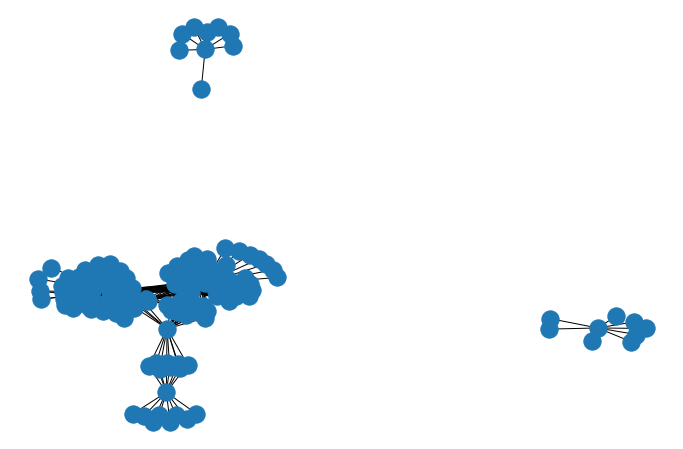

In [100]:
fig, ax=plt.subplots(figsize=(12,8))
GA=nx.from_pandas_edgelist(rules_thres,source='antecedents', target='consequents')
nx.draw(GA,with_labels=False, font_family='Tahoma')
plt.show();

## Collaborative Filtering - Item-Item

In [125]:
from sklearn.metrics.pairwise import cosine_similarity
X = df_clean.T
item_names = df_clean.columns
item_item = cosine_similarity(X)
item_item = pd.DataFrame(item_sim, index=item_names, columns=item_names)
item_item = pd.melt(item_sim, ignore_index=False).reset_index()
item_item.columns = ['item1','item2','cosine']
item_item.sort_values(by='cosine', ascending=False, inplace=True)
item_item = item_item.replace('เครื่องย่อยเศษอาหาร.1', 'เครื่องย่อยเศษอาหาร')
item_item = item_item[item_item['item1'] != item_item['item2']]
item_item['item1_re'] = item_item.apply(lambda x: x['item1'] if x['item1'] > x['item2'] else x['item2'], axis=1)
item_item['item2_re'] = item_item.apply(lambda x: x['item1'] if x['item1']<x['item2'] else x['item2'], axis=1)
item_item.drop(columns=['item1','item2'], inplace=True)
item_item.drop_duplicates(inplace=True)
item_item = item_item[['item1_re', 'item2_re', 'cosine']]
item_item.columns = ['item1', 'item2', 'cosine']
item_item.head(20)

,item1,item2,cosine
3692,ชาบู,ครีมกันแดด,1.000000
1951,ครีมกันแดด,กระเป๋า,1.000000
1983,ชาบู,กระเป๋า,1.000000
3706,โรตี,ครีมกันแดด,0.977008
1998,โรตี,ชาบู,0.977008
1937,โรตี,กระเป๋า,0.977008
1007,กะหรี่(ปั๊บ),กระเป๋า,0.965307
1008,ชาบู,กะหรี่(ปั๊บ),0.965307
1036,ครีมกันแดด,กะหรี่(ปั๊บ),0.965307
1022,โรตี,กะหรี่(ปั๊บ),0.963925


In [126]:
item_item.tail()

,item1,item2,cosine
555,คอร์ส bikini wax,กัญชง,0.0
658,เก้าอี้นวดไฟฟ้า,น้องหมา,0.0
559,เก้าอี้นวดไฟฟ้า,คอร์ส bikini wax,0.0
231,แม่โขง,น้องหมา,0.0
1230,เก้าอี้นวดไฟฟ้า,ชุดนอนไม่ได้นอน,0.0
